## Number of paths tracked by Viterbi

In [29]:
import msprime as msp
import xsmc
from timeit import default_timer as timer
import os

In [ ]:
sample_size = [2, 5, 10, 20, 50, 100, 200, 500, 1000]
seqlen = [10 ** x for x in range(4, 9)]
from collections import defaultdict

d = defaultdict(list)
t = defaultdict(list)
for seed in range(1, 10):
    for s in seqlen:
        sim = msp.simulate(sample_size=1000, length=s, mutation_rate=1e-8, Ne=1e4, recombination_rate=1e-8,
                          random_seed=seed)
        xs = xsmc.XSMC(sim, w=1000)
        for n in sample_size:
            start = timer()
            xs.viterbi(0, list(range(1, n)))
            end = timer()
            # d.setdefault((s, n).setdefault([])
            d[s, n].append(xs._K_n)
            t[s, n].append(end - start)
            print(seed, s, n, t[s, n], xs._K_n.mean())

1 10000 2 [0.00037653185427188873] 2.8333333333333335
1 10000 5 [0.00047604553401470184] 1.7291666666666667
1 10000 10 [0.0012314170598983765] 1.712962962962963
1 10000 20 [0.00039581768214702606] 1.7456140350877194
1 10000 50 [0.0006259623914957047] 1.7125850340136055
1 10000 100 [0.0010302085429430008] 1.6978114478114479
1 10000 200 [0.0017692986875772476] 1.6930485762144054
1 10000 500 [0.004012010991573334] 1.694054776219105
1 10000 1000 [0.007625313475728035] 1.6940273606940273
1 100000 2 [0.0009517446160316467] 5.568627450980392
1 100000 5 [0.0011837072670459747] 3.075980392156863
1 100000 10 [0.001571599394083023] 2.4193899782135078
1 100000 20 [0.0024367067962884903] 2.390092879256966
1 100000 50 [0.004016535356640816] 1.9027611044417767
1 100000 100 [0.007286770269274712] 1.8252129134482076
1 100000 200 [0.01369495689868927] 1.8265838998916148
1 100000 500 [0.03320336900651455] 1.8383630005108256
1 100000 1000 [0.0654235128313303] 1.8474552984356907
1 1000000 2 [0.008567713201

3 1000000 500 [0.25246379896998405, 0.23874516412615776, 0.2393703367561102] 1.7336649346597386
3 1000000 1000 [0.48085013031959534, 0.4853173289448023, 0.5007767714560032] 1.7332322342302382
3 10000000 2 [0.07022145576775074, 0.07247497327625751, 0.06938881985843182] 5.368426314737053
3 10000000 5 [0.09166557900607586, 0.09239500388503075, 0.08974047563970089] 2.9700559888022395
3 10000000 10 [0.1192644964903593, 0.12062941305339336, 0.12346433475613594] 2.524539536537137
3 10000000 20 [0.1697423979640007, 0.16288703493773937, 0.17076370678842068] 2.1887148886012273
3 10000000 50 [0.30221986398100853, 0.31576685421168804, 0.3205254841595888] 1.9782410864765823
3 10000000 100 [0.5426654275506735, 0.5521335266530514, 0.5608942043036222] 1.8683344139252958
3 10000000 200 [1.0168481785804033, 1.038015814498067, 1.0152728538960218] 1.7724530470790265
3 10000000 500 [2.443685920909047, 2.4469043351709843, 2.462646873667836] 1.7679546255077643
3 10000000 1000 [4.873908976092935, 4.7848029937

5 1000000 20 [0.02148136869072914, 0.016282282769680023, 0.017200343310832977, 0.018291372805833817, 0.016987359151244164] 2.245876667717197
5 1000000 50 [0.04008257016539574, 0.030007371678948402, 0.034976107999682426, 0.033768292516469955, 0.03208097442984581] 2.007984031936128
5 1000000 100 [0.0712980218231678, 0.05408495292067528, 0.06193654425442219, 0.05252160131931305, 0.056193633005023] 1.8796346700538318
5 1000000 200 [0.11485730670392513, 0.10233915597200394, 0.1062711626291275, 0.09855328314006329, 0.10322598367929459] 1.7992607749325469
5 1000000 500 [0.25246379896998405, 0.23874516412615776, 0.2393703367561102, 0.2385043315589428, 0.25074061192572117] 1.7939431757727031
5 1000000 1000 [0.48085013031959534, 0.4853173289448023, 0.5007767714560032, 0.4742252975702286, 0.49168588407337666] 1.786992581403759
5 10000000 2 [0.07022145576775074, 0.07247497327625751, 0.06938881985843182, 0.0720849372446537, 0.06956911087036133] 5.377124575084983
5 10000000 5 [0.09166557900607586, 0

6 10000000 50 [0.30221986398100853, 0.31576685421168804, 0.3205254841595888, 0.30245679058134556, 0.2846047766506672, 0.311609597876668] 1.9242498439087692
6 10000000 100 [0.5426654275506735, 0.5521335266530514, 0.5608942043036222, 0.5476864222437143, 0.5178505945950747, 0.5558824930340052] 1.8504420328055602
6 10000000 200 [1.0168481785804033, 1.038015814498067, 1.0152728538960218, 1.012515215203166, 0.9875340685248375, 1.016834618523717] 1.7743139814248206
6 10000000 500 [2.443685920909047, 2.4469043351709843, 2.462646873667836, 2.432433132082224, 2.387289995327592, 2.44605416059494] 1.7654629394762331
6 10000000 1000 [4.873908976092935, 4.784802993759513, 4.862918568775058, 4.792141566053033, 4.8767548110336065, 4.822542106732726] 1.7597066172351115
6 100000000 2 [0.839050654321909, 0.875059749931097, 0.8430879767984152, 0.839122049510479, 0.8538502994924784, 0.8511623963713646] 5.320583588328233
6 100000000 5 [1.0466715283691883, 1.0562518946826458, 1.0368346404284239, 1.0427150968

7 10000000 200 [1.0168481785804033, 1.038015814498067, 1.0152728538960218, 1.012515215203166, 0.9875340685248375, 1.016834618523717, 1.029158040881157] 1.7828831218680887
7 10000000 500 [2.443685920909047, 2.4469043351709843, 2.462646873667836, 2.432433132082224, 2.387289995327592, 2.44605416059494, 2.4181301053613424] 1.7331900353396255
7 10000000 1000 [4.873908976092935, 4.784802993759513, 4.862918568775058, 4.792141566053033, 4.8767548110336065, 4.822542106732726, 4.739139577373862] 1.720702005744997
7 100000000 2 [0.839050654321909, 0.875059749931097, 0.8430879767984152, 0.839122049510479, 0.8538502994924784, 0.8511623963713646, 0.833408186212182] 5.378082438351233
7 100000000 5 [1.0466715283691883, 1.0562518946826458, 1.0368346404284239, 1.0427150968462229, 1.078635063022375, 1.0591271053999662, 1.0340460687875748] 2.9894377112457753
7 100000000 10 [1.3023087345063686, 1.340391455218196, 1.335783602669835, 1.3249384611845016, 1.3276215475052595, 1.351371532306075, 1.31230795383453

8 10000000 50 [0.30221986398100853, 0.31576685421168804, 0.3205254841595888, 0.30245679058134556, 0.2846047766506672, 0.311609597876668, 0.3199130203574896, 0.32115705497562885] 1.956302617027615
8 10000000 100 [0.5426654275506735, 0.5521335266530514, 0.5608942043036222, 0.5476864222437143, 0.5178505945950747, 0.5558824930340052, 0.5652475841343403, 0.5605018809437752] 1.8529879882609337
8 10000000 200 [1.0168481785804033, 1.038015814498067, 1.0152728538960218, 1.012515215203166, 0.9875340685248375, 1.016834618523717, 1.029158040881157, 1.0161628555506468] 1.763461880488224
8 10000000 500 [2.443685920909047, 2.4469043351709843, 2.462646873667836, 2.432433132082224, 2.387289995327592, 2.44605416059494, 2.4181301053613424, 2.4436873737722635] 1.7512974359036009
8 10000000 1000 [4.873908976092935, 4.784802993759513, 4.862918568775058, 4.792141566053033, 4.8767548110336065, 4.822542106732726, 4.739139577373862, 4.76728499867022] 1.7303990653320787
8 100000000 2 [0.839050654321909, 0.875059

9 1000000 500 [0.25246379896998405, 0.23874516412615776, 0.2393703367561102, 0.2385043315589428, 0.25074061192572117, 0.23852131702005863, 0.2413126491010189, 0.2452670782804489, 0.2392604574561119] 1.7417949671798687
9 1000000 1000 [0.48085013031959534, 0.4853173289448023, 0.5007767714560032, 0.4742252975702286, 0.49168588407337666, 0.49176411889493465, 0.48268028162419796, 0.4931196216493845, 0.49282786436378956] 1.7402492312671953
9 10000000 2 [0.07022145576775074, 0.07247497327625751, 0.06938881985843182, 0.0720849372446537, 0.06956911087036133, 0.07257143966853619, 0.07250246219336987, 0.07223103940486908, 0.07027522474527359] 5.338332333533294
9 10000000 5 [0.09166557900607586, 0.09239500388503075, 0.08974047563970089, 0.09102405607700348, 0.08882431872189045, 0.09114066325128078, 0.09299266710877419, 0.09423952363431454, 0.09223410859704018] 2.98497800439912
9 10000000 10 [0.1192644964903593, 0.12062941305339336, 0.12346433475613594, 0.11694801598787308, 0.11662361957132816, 0.1

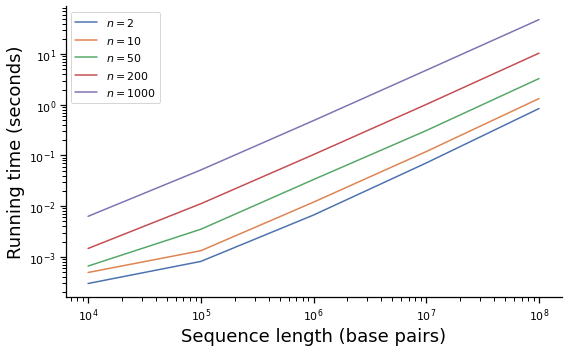

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import xsmc.supporting.plotting

fig, ax = plt.subplots(figsize=(8, 5))
import numpy as np
for n in sample_size[::2]:
    mu = np.array([np.mean(t[s, n]) for s in seqlen])
    std = np.array([np.std(t[s, n]) for s in seqlen])
    ax.plot(seqlen, mu, label=f"$n={n}$")
    #plt.fill_between(seqlen, mu-std, mu+std)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_ylabel("Running time (seconds)")
ax.set_xlabel("Sequence length (base pairs)")
fig.tight_layout()
fig.savefig(os.path.join("../../../exact_decoding_paper", "figures", "viterbi", "wall_time.pdf"))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(8, 5))
for n in sample_size[::2]:
    mu = np.array([np.mean(d[s, n]) for s in seqlen])
    std = np.array([np.std(d[s, n]) for s in seqlen])
    ax.plot(seqlen, mu, label=f"$n={n}$")
    # plt.fill_between(seqlen, mu-std, mu+std)
ax.set_xscale('log')
ax.legend()
ax.set_ylabel("$\mathbb{E}|K_n|$")
ax.set_xlabel("Sequence length (base pairs)")
fig.tight_layout()
fig.savefig(os.path.join("../../../exact_decoding_paper", "figures", "viterbi", "K_n.pdf"))